In [1]:
# initialization cell

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from classy_sz import Class
from scipy.optimize import fsolve
from scipy.interpolate import interp1d
import math
import time
import os
current_path = os.getcwd()
path_to_files = current_path + '/../sz_auxiliary_files/'
import matplotlib.patches as mpatches

font = {'size'   : 16, 'family':'STIXGeneral'}
axislabelfontsize='large'
matplotlib.rc('font', **font)
matplotlib.mathtext.rcParams['legend.fontsize']='medium'
plt.rcParams["figure.figsize"] = [8.0,6.0]
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"]})

arcmin_to_radians = np.pi/(60.*180.)

In [2]:
# the parameters needed for the ksz calculations:
ksz_params = {
#fiducial ksz params

'k_min_for_pk_class_sz' : 0.001,
'k_max_for_pk_class_sz' : 60.0,
'k_per_decade_class_sz' : 50,
'P_k_max_h/Mpc' : 100.0,
# 'non linear' : 'halofit',


# 'sz_verbose' : 0, # for full output when not using python wrapper set to >100, this doesnt work with python wrapper

'nfw_profile_epsabs' : 1e-33,
'nfw_profile_epsrel' : 0.001,



# 'nonlinear_verbose' : 0,
'ndim_masses' : 80,
'ndim_redshifts' : 80,
#'l_max_scalars' : 5000,



'n_ell_density_profile' : 50,
'n_m_density_profile' : 50,
'n_z_density_profile' : 50,
'k_per_decade_for_pk' : 50,
'z_max_pk' : 4.0,
    

# slow:
# 'n_z_psi_b1g' : 100,
# 'n_l_psi_b1g' : 400,

# 'n_z_psi_b2g' : 100,
# 'n_l_psi_b2g' : 400,

# 'n_z_psi_b2t' : 100,
# 'n_l_psi_b2t' : 400,

# 'n_z_psi_b1t' : 100,
# 'n_l_psi_b1t' : 100,

# 'n_z_psi_b1gt' : 100,
# 'n_l_psi_b1gt' : 100,
    
    
# fast:
'n_z_psi_b1g' : 50,
'n_l_psi_b1g' : 50,

'n_z_psi_b2g' : 50,
'n_l_psi_b2g' : 50,

'n_z_psi_b2t' : 50,
'n_l_psi_b2t' : 50,

'n_z_psi_b1t' : 50,
'n_l_psi_b1t' : 50,

'n_z_psi_b1gt' : 50,
'n_l_psi_b1gt' : 50,

'N_samp_fftw' : 800, # fast: 800 ;  slow: 2000
'l_min_samp_fftw' : 1e-9,
'l_max_samp_fftw' : 1e9,
    
'N_kSZ2_gal_multipole_grid' :  70,
'N_kSZ2_gal_theta_grid' :  70,
'ell_min_kSZ2_gal_multipole_grid' : 2.,
'ell_max_kSZ2_gal_multipole_grid' : 2e5,
}

# the parameters needed for cosmology:

cosmo_params = {
'omega_b': 0.02242,
'omega_cdm':  0.11933,
'h': 0.6766,
'tau_reio': 0.0561,
'ln10^{10}A_s': 3.047,
'n_s': 0.9665,

'k_pivot': 0.05,
'N_ncdm': 1,
'N_ur': 2.0328,
'm_ncdm': 0.06    

}

# the common parameters:

common_params = {

'z_min' : 0.005,
'z_max' : 4.0,
'M_min' : 7.0e8, 
'M_max' : 3.5e15,
    

'delta for galaxies' : "200c",
'delta for matter density' : "200c",
'mass function' : 'T08M200c',
'concentration parameter' : 'B13',

'redshift_epsabs': 1.0e-40,
'redshift_epsrel': 0.0005,
'mass_epsabs': 1.0e-40,
'mass_epsrel': 0.0005,


'ell_max': 1600.0,
'ell_min': 2.0,
'dell': 10,

'non linear' : 'halofit',
'pk_nonlinear_for_vrms2' : 1,
'hm_consistency' : 1,
    
'f_free' : 1.0,
    

# 'ndim_masses': 150,
# 'ndim_redshifts': 150,

# 'P_k_max_h/Mpc': 50.0,
# 'k_min_for_pk_class_sz': 0.0001,
# 'k_max_for_pk_class_sz': 10.0,
# 'k_per_decade_class_sz': 20.0,
}


# HOD params for kSZ2-g

bestfit_blue_hod_params = {
'galaxy_sample': 'unwise',
'galaxy_sample_id': "blue",
'UNWISE_dndz_file' : "/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/normalised_dndz_cosmos.txt",
   

'sigma_log10M_HOD' : 0.69,
'alpha_s_HOD' :  1.30,
'M1_prime_HOD' : 5.03e12, # Msun/h
'M_min_HOD' : 6.25e11, # Msun/h
'cl_gal_gal_A_sn' : -0.26e-7, 
'x_out_truncated_nfw_profile_satellite_galaxies' : 1.09,


'M0_HOD':0,  # Msun/h
'M0 equal M_min (HOD)': 'no',
'x_out_truncated_nfw_profile':1.0,    
    
}

bestfit_green_hod_params = {
'galaxy_sample': 'unwise',
'galaxy_sample_id': "green",
'UNWISE_dndz_file' : "/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/normalised_dndz_cosmos.txt",
   

'sigma_log10M_HOD' : 0.97,
'alpha_s_HOD' :  1.30,
'M1_prime_HOD' : 2.76e13, # Msun/h
'M_min_HOD' : 1.34e13, # Msun/h
'cl_gal_gal_A_sn' : 1.38e-7, 
'x_out_truncated_nfw_profile_satellite_galaxies' : 2.75,


'M0_HOD':0,  # Msun/h
'M0 equal M_min (HOD)': 'no',
'x_out_truncated_nfw_profile':1.0,    
    
}


FERRARO, HILL +, Planck kSZ2-g

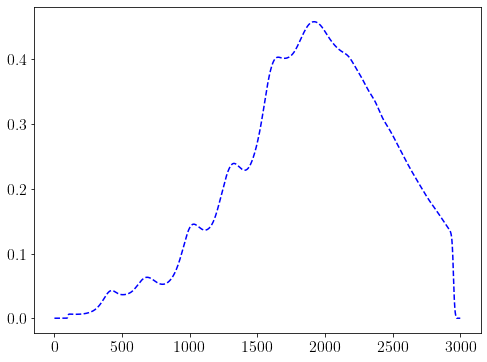

In [3]:
l_planck, F_planck = np.loadtxt('/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/unwise_filter_functions_l_fl.txt',unpack=True)
plt.plot(l_planck,F_planck,label='ola planck',ls='--',c='b')

use fsky = 0.7 see table II of https://arxiv.org/pdf/1605.02722.pdf <br>
beam of 5 arcmin and noise of 47 uK as us in planck_nl.txt  <br>
multipole range : 100 - 3000  <br>
galaxy density:  50 million galaxies over half of the sky <br>
means 50x10^6/2pi so Shot-noise = 1.2566370614359172e-07 <br>
galaxy bias assumed constant to be bg = 1.13 ± 0.02 (see fig 7 of https://arxiv.org/pdf/1605.02722.pdf)

WISE redshift distribution:

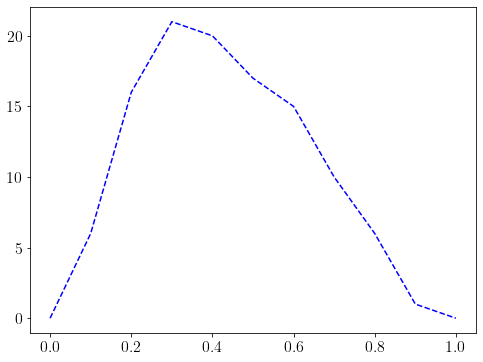

In [63]:
z, dnwise = np.loadtxt('/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/wise.txt',unpack=True)
plt.plot(z,dnwise,label='wise dndz',ls='--',c='b')

In [65]:
# np.savetxt('/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/wise_normalized.txt',np.c_[z,dnwise/np.trapz(dnwise,z)])

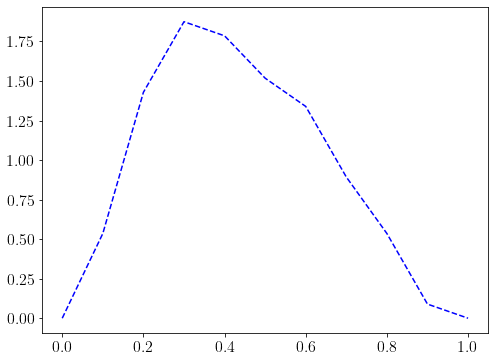

In [66]:
z, dnwise = np.loadtxt('/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/wise_normalized.txt',unpack=True)
plt.plot(z,dnwise,label='wise dndz',ls='--',c='b')

In [67]:
np.trapz(dnwise,z)

0.9999999999999999

kSZ2-wise templates

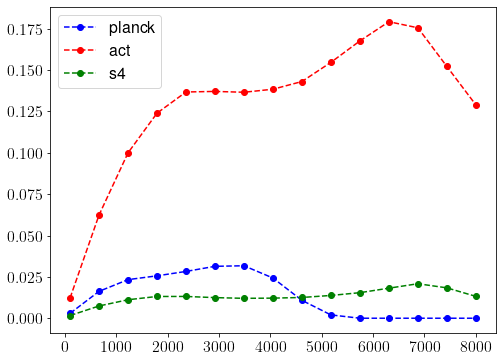

In [5]:
F = np.loadtxt('/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/ksz2g_wise_simone16template.txt')
ls = F[0,:]
cls_planck = F[1,:]
cls_advact = F[2,:]
cls_s4 = F[3,:]
plt.plot(ls,cls_planck,label='planck',ls='--',c='b',marker='o')
plt.plot(ls,cls_advact,label='act',ls='--',c='r',marker='o')
plt.plot(ls,cls_s4,label='s4',ls='--',c='g',marker='o')
plt.legend()

In [123]:
M = Class()
M.set(ksz_params)
M.set(common_params)
M.set(cosmo_params)
# M.set(bestfit_green_hod_params)


M.set(
    {
'output':'gal_gal_hf,kSZ_kSZ_gal_hf,kSZ_kSZ_gal_covmat',

'galaxy_sample': 'custom',
'full_path_to_dndz_gal':'/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/wise_normalized.txt',

        
        
'ksz_filter_file' : '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/unwise_filter_functions_l_fl.txt',
'full_path_to_noise_curve_for_t_t': '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/noise_curves/planck_nl.txt',

        
'pk_nonlinear_for_vrms2' : 0,        

'dlogell' : 0.,
'dell': 564.,
'ell_max' : 3000.0,
'ell_min' : 100.0,
'f_sky':0.7, 

'effective_galaxy_bias': 1.13,
'cl_gal_gal_A_sn' : 1.2566370614359172e-07, 
    
'use_bg_at_z_in_ksz2g_eff' : 0,
'use_bg_eff_in_ksz2g_eff' : 1,
'use_fdndz_for_ksz2g_eff':0,
      })

ti = time.perf_counter()
M.compute()
tf = time.perf_counter()
print(f"computed in {tf - ti:0.4f} seconds")

computed in 86.0471 seconds


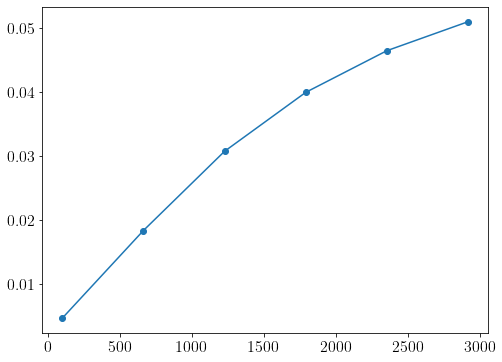

In [124]:
plt.plot(M.cl_gg()['ell'],M.cl_gg()['hf'],marker='o')

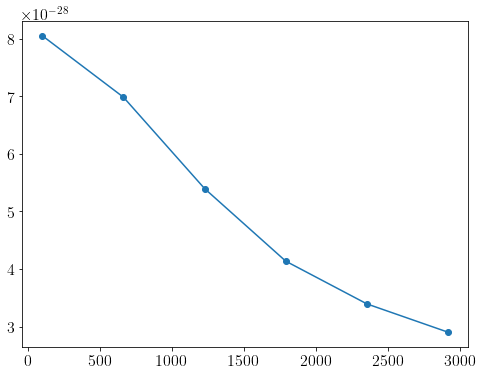

In [125]:
plt.plot(M.cl_t2t2f()['ell'],M.cl_t2t2f()['t2t2f'],marker='o')

In [126]:
cl_kSZ_kSZ_g_planck = M.cl_kSZ_kSZ_g()

cl_kSZ_kSZ_g = cl_kSZ_kSZ_g_planck.copy()
cl_tot = np.asarray(np.asarray(cl_kSZ_kSZ_g['hf']))
cl_lensing = 0.*np.asarray(cl_kSZ_kSZ_g['lensing term'])
covll = np.asarray(cl_kSZ_kSZ_g['covmat'])

fac_plc = (2.726e6)**2*np.asarray(cl_kSZ_kSZ_g_planck['ell'])*(np.asarray(cl_kSZ_kSZ_g_planck['ell'])+1.)/2./np.pi
l_max_plc= 3000
l = np.asarray(cl_kSZ_kSZ_g['ell'])
cl_hf = np.asarray(cl_kSZ_kSZ_g['hf'])
snrl = cl_tot**2/covll
                   
snrl = np.sqrt(np.sum(snrl[l<l_max_plc]))
print(snrl)
print(2.*snrl)

2.3089632561965545
4.617926512393109


(0.0, 3000.0)

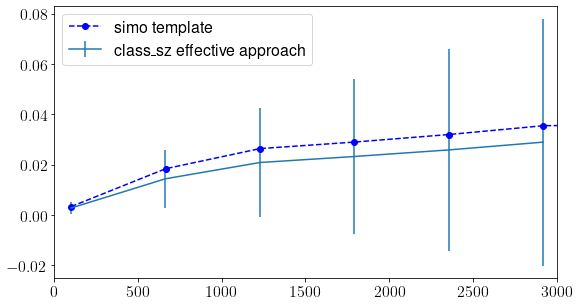

In [127]:
label_size = 17
title_size = 22
legend_size = 13
handle_length = 1.5
fig, (ax1) = plt.subplots(1,1,figsize=(9,5),sharey=True)

ax=ax1

ax.errorbar(l,fac_plc*cl_tot,yerr=fac_plc*np.sqrt(covll),label='class\_sz effective approach')
ax.plot(ls,1.13*cls_planck,label='simo template',ls='--',c='b',marker='o')
# ax.plot(l,fac_plc*cl_lensing)
ax.legend(loc=2)
ax.set_xlim(0.,3000)


In [128]:
# Ferraro + : 0.155 see https://arxiv.org/pdf/1605.02722.pdf
M.get_f_b()


0.15745030410017352

In [129]:
M.get_f_free()

1.0

FERRARO, HILL +, AdvACT kSZ2-g

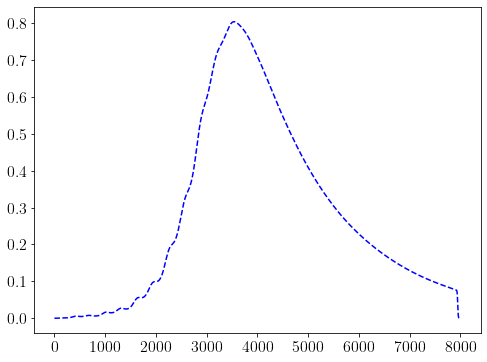

In [130]:
l_planck, F_planck = np.loadtxt('/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/AdvACT_kSZfilt_ellmax8000_smoothed_tapered_nosqrt_w1p5arcminbeam.txt',unpack=True)
plt.plot(l_planck,F_planck,label='colin advact',ls='--',c='b')

use fsky = 0.5 see table II of https://arxiv.org/pdf/1605.02722.pdf <br>
beam of 1.4 arcmin and noise of 10 uK see Table I of  https://arxiv.org/pdf/1605.02722.pdf <br>
multipole range : 100 - 8000  <br>
galaxy density:  50 million galaxies over half of the sky <br>
means 50x10^6/2pi so Shot-noise = 1.2566370614359172e-07 <br>
galaxy bias assumed constant to be bg = 1.13 ± 0.02 (see fig 7 of https://arxiv.org/pdf/1605.02722.pdf)

WISE redshift distribution:

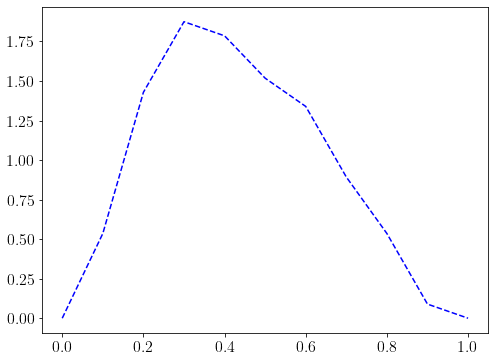

In [131]:
l_planck, F_planck = np.loadtxt('/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/wise_normalized.txt',unpack=True)
plt.plot(l_planck,F_planck,label='wise dndz',ls='--',c='b')

kSZ2-wise templates

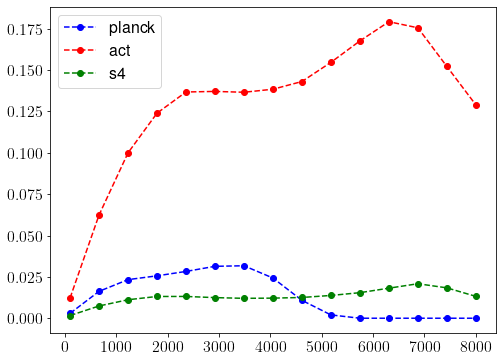

In [132]:
F = np.loadtxt('/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/ksz2g_wise_simone16template.txt')
ls = F[0,:]
cls_planck = F[1,:]
cls_advact = F[2,:]
cls_s4 = F[3,:]
plt.plot(ls,cls_planck,label='planck',ls='--',c='b',marker='o')
plt.plot(ls,cls_advact,label='act',ls='--',c='r',marker='o')
plt.plot(ls,cls_s4,label='s4',ls='--',c='g',marker='o')
plt.legend()

In [133]:
M = Class()
M.set(ksz_params)
M.set(common_params)
M.set(cosmo_params)
# M.set(bestfit_green_hod_params)


M.set(
    {
'output':'gal_gal_hf,kSZ_kSZ_gal_hf,kSZ_kSZ_gal_covmat',
'galaxy_sample': 'custom',
'full_path_to_dndz_gal':'/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/wise_normalized.txt',

'ksz_filter_file' : '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/AdvACT_kSZfilt_ellmax8000_smoothed_tapered_nosqrt_w1p5arcminbeam.txt',
'full_path_to_noise_curve_for_t_t': '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/noise_curves/advact_nl_10uk_1p4arcmin.txt',

        
'pk_nonlinear_for_vrms2' : 0,        

'dlogell' : 0.,
'dell': 564.,
'ell_max' : 8000.0,
'ell_min' : 100.0,
'f_sky':0.5, 

'effective_galaxy_bias': 1.13,
'cl_gal_gal_A_sn' : 1.2566370614359172e-07, 
    
'use_bg_at_z_in_ksz2g_eff' : 0,
'use_bg_eff_in_ksz2g_eff' : 1,
'use_fdndz_for_ksz2g_eff':0,
      })

ti = time.perf_counter()
M.compute()
tf = time.perf_counter()
print(f"computed in {tf - ti:0.4f} seconds")

computed in 145.4090 seconds


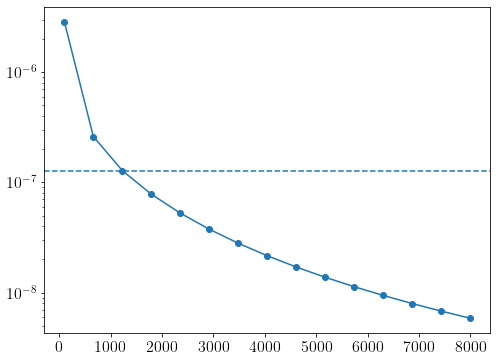

In [134]:
plt.plot(M.cl_gg()['ell'],np.asarray(M.cl_gg()['hf'])/(np.asarray(M.cl_t2t2f()['ell'])*(np.asarray(M.cl_t2t2f()['ell'])+1.)/2./np.pi),marker='o')
plt.axhline(M.A_sn(),ls='--')
plt.yscale('log')

In [135]:
cl_kSZ_kSZ_g_planck = M.cl_kSZ_kSZ_g()

cl_kSZ_kSZ_g = cl_kSZ_kSZ_g_planck.copy()
cl_tot = np.asarray(np.asarray(cl_kSZ_kSZ_g['hf']))
cl_lensing = 0.*np.asarray(cl_kSZ_kSZ_g['lensing term'])
covll = np.asarray(cl_kSZ_kSZ_g['covmat'])

fac_plc = (2.726e6)**2*np.asarray(cl_kSZ_kSZ_g_planck['ell'])*(np.asarray(cl_kSZ_kSZ_g_planck['ell'])+1.)/2./np.pi
l_max_plc= 8000
l = np.asarray(cl_kSZ_kSZ_g['ell'])
cl_hf = np.asarray(cl_kSZ_kSZ_g['hf'])
snrl = cl_tot**2/covll
                   
snrl = np.sqrt(np.sum(snrl[l<l_max_plc]))
print(snrl)
print(2.*snrl)

104.75873557245903
209.51747114491806


Text(0, 0.5, 'Normalized cov')

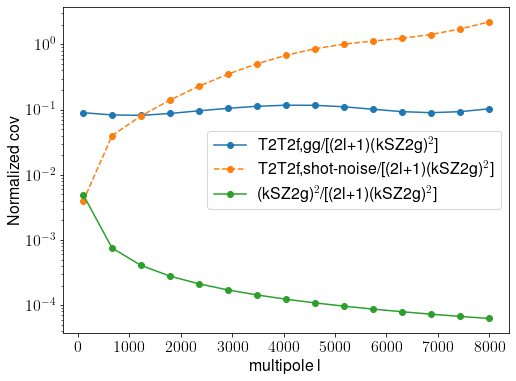

In [138]:
fac_dl = (2.726e6)**2*np.asarray(M.cl_t2t2f()['ell'])*(np.asarray(M.cl_t2t2f()['ell'])+1.)/2./np.pi

den =  (2.*np.asarray(M.cl_t2t2f()['ell'])+1.)*np.asarray(np.asarray(cl_kSZ_kSZ_g['hf']))**2.

ya = np.asarray(M.cl_t2t2f()['t2t2f'])*np.asarray(M.cl_gg()['hf'])/(np.asarray(M.cl_t2t2f()['ell'])*(np.asarray(M.cl_t2t2f()['ell'])+1.)/2./np.pi)
plt.plot(M.cl_t2t2f()['ell'],ya/den,marker='o',label=r'T2T2f,gg/[(2l+1)(kSZ2g)$^2$]')
ya = np.asarray(M.cl_t2t2f()['t2t2f'])*M.A_sn()
plt.plot(M.cl_t2t2f()['ell'],ya/den,marker='o',label=r'T2T2f,shot-noise/[(2l+1)(kSZ2g)$^2$]',ls='--')
ya = np.asarray(np.asarray(cl_kSZ_kSZ_g['hf']))**2.
plt.plot(M.cl_t2t2f()['ell'],ya/den,label=r'(kSZ2g)$^2$/[(2l+1)(kSZ2g)$^2$]',marker='o')

plt.yscale('log')
plt.legend()
plt.xlabel('multipole l')
plt.ylabel('Normalized cov')

(0.0, 9000.0)

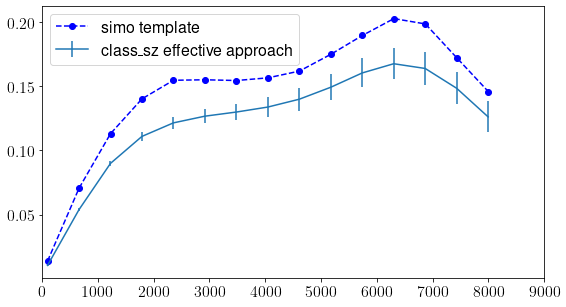

In [137]:
label_size = 17
title_size = 22
legend_size = 13
handle_length = 1.5
fig, (ax1) = plt.subplots(1,1,figsize=(9,5),sharey=True)

ax=ax1

ax.errorbar(l,fac_plc*cl_tot,yerr=fac_plc*np.sqrt(covll),label='class\_sz effective approach')

ax.plot(ls,1.13*cls_advact,label='simo template',ls='--',c='b',marker='o')
# ax.plot(l,fac_plc*cl_lensing)
ax.legend(loc=2)
ax.set_xlim(0.,9000)


In [26]:
# Ferraro + : 0.155 see https://arxiv.org/pdf/1605.02722.pdf
M.get_f_b()


0.15745030410017352

In [27]:
M.get_f_free()

1.0

Planck kSZ2-g

In [3]:
M = Class()
M.set(ksz_params)
M.set(common_params)
M.set(cosmo_params)
M.set(bestfit_green_hod_params)


M.set(
    {
'output':'gal_gal_1h,gal_gal_2h,gal_lensmag_1h,gal_lensmag_2h, lensmag_lensmag_1h, lensmag_lensmag_2h,kSZ_kSZ_gal_hf,kSZ_kSZ_gal fft (1h),kSZ_kSZ_gal fft (2h),kSZ_kSZ_gal fft (3h),kSZ_kSZ_gal_covmat,kSZ_kSZ_gal_lensing_term',

'ksz_filter_file' : '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/planck_filter_in_num_filter_functions_l_fl_190122.txt',
'full_path_to_noise_curve_for_t_t': '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/noise_curves/planck_nl.txt',

'dlogell' : 0.,
'dell': 200.,
'ell_max' : 2800.0,
'ell_min' : 400.0,
'f_sky':0.6, 
'gas profile' : 'nfw',
'gas profile mode' : 'agn',
'normalize_gas_density_profile': 1,
'use_bg_at_z_in_ksz2g_eff' : 0,
'use_fdndz_for_ksz2g_eff':0,
      })

ti = time.perf_counter()
M.compute()
tf = time.perf_counter()
print(f"computed in {tf - ti:0.4f} seconds")

computed in 141.7266 seconds


In [7]:
cl_kSZ_kSZ_g_planck = M.cl_kSZ_kSZ_g()

cl_kSZ_kSZ_g = cl_kSZ_kSZ_g_planck.copy()
cl_tot = np.asarray(cl_kSZ_kSZ_g['1h'])+np.asarray(cl_kSZ_kSZ_g['2h'])+np.asarray(cl_kSZ_kSZ_g['3h'])
cl_lensing = np.asarray(cl_kSZ_kSZ_g['lensing term'])
covll = np.asarray(cl_kSZ_kSZ_g['covmat'])

fac_plc = (2.726e6)**2*np.asarray(cl_kSZ_kSZ_g_planck['ell'])*(np.asarray(cl_kSZ_kSZ_g_planck['ell'])+1.)/2./np.pi
l_max_plc= 3000
l = np.asarray(cl_kSZ_kSZ_g['ell'])
cl_hf = np.asarray(cl_kSZ_kSZ_g['hf'])
snrl = cl_tot**2/covll
                   
snrl = np.sqrt(np.sum(snrl[l<l_max_plc]))
print(snrl)

1.0362823248392565


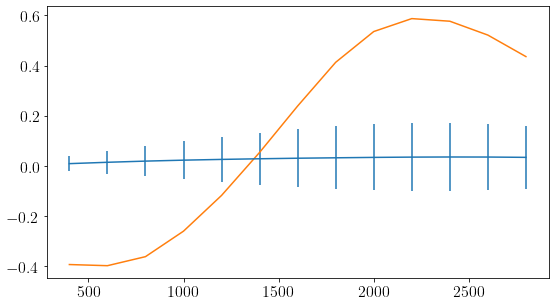

In [11]:
label_size = 17
title_size = 22
legend_size = 13
handle_length = 1.5
fig, (ax1) = plt.subplots(1,1,figsize=(9,5),sharey=True)

ax=ax1

ax.errorbar(l,fac_plc*cl_tot,yerr=fac_plc*np.sqrt(covll))
ax.plot(l,fac_plc*cl_lensing)

In [54]:
cl_kSZ_kSZ_g_fiducial = cl_kSZ_kSZ_g_planck.copy()
ell_array = np.asarray(cl_kSZ_kSZ_g_fiducial['ell'])

# fac_cov = 1e0
covmat_data = np.diag(covll)

inv_covmat_data = np.linalg.inv(covmat_data)
det_covmat_data = np.linalg.det(covmat_data)

fac_cl_to_dl = (2.726e6)**2*np.asarray(cl_kSZ_kSZ_g_fiducial['ell'])*(np.asarray(cl_kSZ_kSZ_g_fiducial['ell'])+1.)/2./np.pi

cl_ksz_tot = np.asarray(cl_kSZ_kSZ_g_fiducial['1h'])+np.asarray(cl_kSZ_kSZ_g_fiducial['2h'])+np.asarray(cl_kSZ_kSZ_g_fiducial['3h'])
cl_lens = np.asarray(cl_kSZ_kSZ_g['lensing term'])


In [55]:
dcl_kSZ_kSZ_g_tot = []
dl_kSZ_kSZ_g_tot_plus = []
dl_kSZ_kSZ_g_tot_minus = []

delta_p_over_p = 1e-7
param_list = ['A_ksz','A_lens']
param_fiducial_values = [1.,1.]
comps_list = [cl_ksz_tot,cl_lens]


cl_ksz_obs = param_fiducial_values[0]*cl_ksz_tot + param_fiducial_values[1]*cl_lens

for i in range(len(param_list)):
    ti = time.perf_counter()
    
    cl_kSZ_kSZ_g_tot_plus = cl_ksz_obs + delta_p_over_p*param_fiducial_values[i]*comps_list[i]
    dl_kSZ_kSZ_g_tot_plus.append(fac_cl_to_dl*cl_kSZ_kSZ_g_tot_plus)
    
    cl_kSZ_kSZ_g_tot_minus = cl_ksz_obs - delta_p_over_p*param_fiducial_values[i]*comps_list[i]
    dl_kSZ_kSZ_g_tot_minus.append(fac_cl_to_dl*cl_kSZ_kSZ_g_tot_minus)
    
    

    dcl_kSZ_kSZ_g_tot.append((cl_kSZ_kSZ_g_tot_plus-cl_kSZ_kSZ_g_tot_minus)/2./param_fiducial_values[i]/delta_p_over_p)
    tf = time.perf_counter()
    print(f"computed in {tf - ti:0.4f} seconds")

computed in 0.0000 seconds
computed in 0.0000 seconds


In [57]:
#theory parameters
M_parameters = len(param_list)




dmu_parameters = []
for m in range(M_parameters):
    dmu_parameters.append(np.asarray(dcl_kSZ_kSZ_g_tot[m]))#/np.sqrt(fac_cov))


fisher_F = np.zeros((M_parameters,M_parameters))
for a in range(M_parameters):
    for b in range(M_parameters):
        fisher_M_ab = np.outer(dmu_parameters[a],dmu_parameters[b]) + np.outer(dmu_parameters[b],dmu_parameters[a])
        fisher_F[a][b]=0.5*np.trace(np.matmul(inv_covmat_data,fisher_M_ab))

inverse_fisher_F = np.linalg.inv(fisher_F)
fisher_sigmas = []
for m in range(M_parameters):
    fisher_sigmas.append(np.sqrt(inverse_fisher_F[m][m]))
fisher_sigmas = np.asarray(fisher_sigmas)
print(fisher_sigmas) 

[0.97899605 0.0513717 ]


In [85]:
1/0.97899605

1.0214545809454492

advACT kSZ2-g

In [94]:
M = Class()
M.set(ksz_params)
M.set(common_params)
M.set(cosmo_params)
M.set(bestfit_green_hod_params)


M.set(
    {
'output':'gal_gal_1h,gal_gal_2h,gal_lensmag_1h,gal_lensmag_2h, lensmag_lensmag_1h, lensmag_lensmag_2h,kSZ_kSZ_gal fft (1h),kSZ_kSZ_gal fft (2h),kSZ_kSZ_gal fft (3h),kSZ_kSZ_gal_covmat,kSZ_kSZ_gal_lensing_term',

'ksz_filter_file' : '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/advact_filter_functions_l_fl_230222.txt',        
'full_path_to_noise_curve_for_t_t': '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/noise_curves/adv_act_nl.txt',
'dlogell' : 0.,
'dell': 200.,
'ell_max' : 7800.0,
'ell_min' : 400.0,
'f_sky':0.3, 
'gas profile' : 'nfw',
'gas profile mode' : 'agn',
'normalize_gas_density_profile': 1,
'use_bg_at_z_in_ksz2g_eff' : 0,
'use_fdndz_for_ksz2g_eff':0,
      })

ti = time.perf_counter()
M.compute()
tf = time.perf_counter()
print(f"computed in {tf - ti:0.4f} seconds")

computed in 95.4821 seconds


In [95]:
cl_kSZ_kSZ_g_planck = M.cl_kSZ_kSZ_g()

cl_kSZ_kSZ_g = cl_kSZ_kSZ_g_planck.copy()
cl_tot = np.asarray(cl_kSZ_kSZ_g['1h'])+np.asarray(cl_kSZ_kSZ_g['2h'])+np.asarray(cl_kSZ_kSZ_g['3h'])
cl_lensing = np.asarray(cl_kSZ_kSZ_g['lensing term'])
covll = np.asarray(cl_kSZ_kSZ_g['covmat'])

fac_plc = (2.726e6)**2*np.asarray(cl_kSZ_kSZ_g_planck['ell'])*(np.asarray(cl_kSZ_kSZ_g_planck['ell'])+1.)/2./np.pi
l_max_plc= 10000
l = np.asarray(cl_kSZ_kSZ_g['ell'])
cl_hf = np.asarray(cl_kSZ_kSZ_g['hf'])
snrl = cl_tot**2/covll
                   
snrl = np.sqrt(np.sum(snrl[l<l_max_plc]))
print(snrl)

22.37082133203438


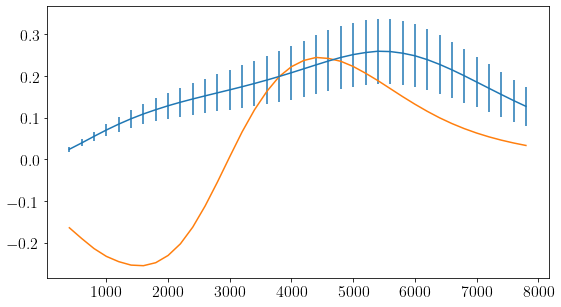

In [96]:
label_size = 17
title_size = 22
legend_size = 13
handle_length = 1.5
fig, (ax1) = plt.subplots(1,1,figsize=(9,5),sharey=True)

ax=ax1

ax.errorbar(l,fac_plc*cl_tot,yerr=fac_plc*np.sqrt(covll))
ax.plot(l,fac_plc*cl_lensing)

In [97]:
cl_kSZ_kSZ_g_fiducial = cl_kSZ_kSZ_g_planck.copy()
ell_array = np.asarray(cl_kSZ_kSZ_g_fiducial['ell'])

# fac_cov = 1e0
covmat_data = np.diag(covll)

inv_covmat_data = np.linalg.inv(covmat_data)
det_covmat_data = np.linalg.det(covmat_data)

fac_cl_to_dl = (2.726e6)**2*np.asarray(cl_kSZ_kSZ_g_fiducial['ell'])*(np.asarray(cl_kSZ_kSZ_g_fiducial['ell'])+1.)/2./np.pi

cl_ksz_tot = np.asarray(cl_kSZ_kSZ_g_fiducial['1h'])+np.asarray(cl_kSZ_kSZ_g_fiducial['2h'])+np.asarray(cl_kSZ_kSZ_g_fiducial['3h'])
cl_lens = np.asarray(cl_kSZ_kSZ_g['lensing term'])


In [98]:
dcl_kSZ_kSZ_g_tot = []
dl_kSZ_kSZ_g_tot_plus = []
dl_kSZ_kSZ_g_tot_minus = []

delta_p_over_p = 1e-7
param_list = ['A_ksz','A_lens']
param_fiducial_values = [1.,1.]
comps_list = [cl_ksz_tot,cl_lens]


cl_ksz_obs = param_fiducial_values[0]*cl_ksz_tot + param_fiducial_values[1]*cl_lens

for i in range(len(param_list)):
    ti = time.perf_counter()
    
    cl_kSZ_kSZ_g_tot_plus = cl_ksz_obs + delta_p_over_p*param_fiducial_values[i]*comps_list[i]
    dl_kSZ_kSZ_g_tot_plus.append(fac_cl_to_dl*cl_kSZ_kSZ_g_tot_plus)
    
    cl_kSZ_kSZ_g_tot_minus = cl_ksz_obs - delta_p_over_p*param_fiducial_values[i]*comps_list[i]
    dl_kSZ_kSZ_g_tot_minus.append(fac_cl_to_dl*cl_kSZ_kSZ_g_tot_minus)
    
    

    dcl_kSZ_kSZ_g_tot.append((cl_kSZ_kSZ_g_tot_plus-cl_kSZ_kSZ_g_tot_minus)/2./param_fiducial_values[i]/delta_p_over_p)
    tf = time.perf_counter()
    print(f"computed in {tf - ti:0.4f} seconds")

computed in 0.0000 seconds
computed in 0.0000 seconds


In [99]:
#theory parameters
M_parameters = len(param_list)




dmu_parameters = []
for m in range(M_parameters):
    dmu_parameters.append(np.asarray(dcl_kSZ_kSZ_g_tot[m]))#/np.sqrt(fac_cov))


fisher_F = np.zeros((M_parameters,M_parameters))
for a in range(M_parameters):
    for b in range(M_parameters):
        fisher_M_ab = np.outer(dmu_parameters[a],dmu_parameters[b]) + np.outer(dmu_parameters[b],dmu_parameters[a])
        fisher_F[a][b]=0.5*np.trace(np.matmul(inv_covmat_data,fisher_M_ab))

inverse_fisher_F = np.linalg.inv(fisher_F)
fisher_sigmas = []
for m in range(M_parameters):
    fisher_sigmas.append(np.sqrt(inverse_fisher_F[m][m]))
fisher_sigmas = np.asarray(fisher_sigmas)
print(fisher_sigmas) 

[0.05017583 0.02136475]


In [100]:
1./fisher_sigmas

array([19.92991565, 46.80606379])

In [76]:
1./0.04345354

23.013084779744066

SO kSZ2-g

In [86]:
M = Class()
M.set(ksz_params)
M.set(common_params)
M.set(cosmo_params)
M.set(bestfit_green_hod_params)


M.set(
    {
'output':'gal_gal_1h,gal_gal_2h,gal_lensmag_1h,gal_lensmag_2h, lensmag_lensmag_1h, lensmag_lensmag_2h,kSZ_kSZ_gal fft (1h),kSZ_kSZ_gal fft (2h),kSZ_kSZ_gal fft (3h),kSZ_kSZ_gal_covmat,kSZ_kSZ_gal_lensing_term',

'ksz_filter_file' : '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/so_goal_filter_functions_l_fl_230222.txt',        
'full_path_to_noise_curve_for_t_t': '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/noise_curves/so_goal_nl.txt',
'dlogell' : 0.,
'dell': 200.,
'ell_max' : 9800.0,
'ell_min' : 400.0,
'f_sky':0.4, 
'gas profile' : 'nfw',
'gas profile mode' : 'agn',
'normalize_gas_density_profile': 1,
'use_bg_at_z_in_ksz2g_eff' : 0,
'use_fdndz_for_ksz2g_eff':0,
      })

ti = time.perf_counter()
M.compute()
tf = time.perf_counter()
print(f"computed in {tf - ti:0.4f} seconds")

computed in 118.9926 seconds


In [87]:
cl_kSZ_kSZ_g_planck = M.cl_kSZ_kSZ_g()

cl_kSZ_kSZ_g = cl_kSZ_kSZ_g_planck.copy()
cl_tot = np.asarray(cl_kSZ_kSZ_g['1h'])+np.asarray(cl_kSZ_kSZ_g['2h'])+np.asarray(cl_kSZ_kSZ_g['3h'])
cl_lensing = np.asarray(cl_kSZ_kSZ_g['lensing term'])
covll = np.asarray(cl_kSZ_kSZ_g['covmat'])

fac_plc = (2.726e6)**2*np.asarray(cl_kSZ_kSZ_g_planck['ell'])*(np.asarray(cl_kSZ_kSZ_g_planck['ell'])+1.)/2./np.pi
l_max_plc= 10000
l = np.asarray(cl_kSZ_kSZ_g['ell'])
cl_hf = np.asarray(cl_kSZ_kSZ_g['hf'])
snrl = cl_tot**2/covll
                   
snrl = np.sqrt(np.sum(snrl[l<l_max_plc]))
print(snrl)

120.47904228071909


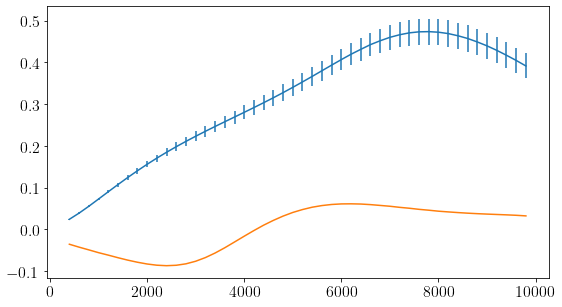

In [89]:
label_size = 17
title_size = 22
legend_size = 13
handle_length = 1.5
fig, (ax1) = plt.subplots(1,1,figsize=(9,5),sharey=True)

ax=ax1

ax.errorbar(l,fac_plc*cl_tot,yerr=fac_plc*np.sqrt(covll))
ax.plot(l,fac_plc*cl_lensing)

In [90]:
cl_kSZ_kSZ_g_fiducial = cl_kSZ_kSZ_g_planck.copy()
ell_array = np.asarray(cl_kSZ_kSZ_g_fiducial['ell'])

# fac_cov = 1e0
covmat_data = np.diag(covll)

inv_covmat_data = np.linalg.inv(covmat_data)
det_covmat_data = np.linalg.det(covmat_data)

fac_cl_to_dl = (2.726e6)**2*np.asarray(cl_kSZ_kSZ_g_fiducial['ell'])*(np.asarray(cl_kSZ_kSZ_g_fiducial['ell'])+1.)/2./np.pi

cl_ksz_tot = np.asarray(cl_kSZ_kSZ_g_fiducial['1h'])+np.asarray(cl_kSZ_kSZ_g_fiducial['2h'])+np.asarray(cl_kSZ_kSZ_g_fiducial['3h'])
cl_lens = np.asarray(cl_kSZ_kSZ_g['lensing term'])


In [91]:
dcl_kSZ_kSZ_g_tot = []
dl_kSZ_kSZ_g_tot_plus = []
dl_kSZ_kSZ_g_tot_minus = []

delta_p_over_p = 1e-7
param_list = ['A_ksz','A_lens']
param_fiducial_values = [1.,1.]
comps_list = [cl_ksz_tot,cl_lens]


cl_ksz_obs = param_fiducial_values[0]*cl_ksz_tot + param_fiducial_values[1]*cl_lens

for i in range(len(param_list)):
    ti = time.perf_counter()
    
    cl_kSZ_kSZ_g_tot_plus = cl_ksz_obs + delta_p_over_p*param_fiducial_values[i]*comps_list[i]
    dl_kSZ_kSZ_g_tot_plus.append(fac_cl_to_dl*cl_kSZ_kSZ_g_tot_plus)
    
    cl_kSZ_kSZ_g_tot_minus = cl_ksz_obs - delta_p_over_p*param_fiducial_values[i]*comps_list[i]
    dl_kSZ_kSZ_g_tot_minus.append(fac_cl_to_dl*cl_kSZ_kSZ_g_tot_minus)
    
    

    dcl_kSZ_kSZ_g_tot.append((cl_kSZ_kSZ_g_tot_plus-cl_kSZ_kSZ_g_tot_minus)/2./param_fiducial_values[i]/delta_p_over_p)
    tf = time.perf_counter()
    print(f"computed in {tf - ti:0.4f} seconds")

computed in 0.0000 seconds
computed in 0.0000 seconds


In [92]:
#theory parameters
M_parameters = len(param_list)




dmu_parameters = []
for m in range(M_parameters):
    dmu_parameters.append(np.asarray(dcl_kSZ_kSZ_g_tot[m]))#/np.sqrt(fac_cov))


fisher_F = np.zeros((M_parameters,M_parameters))
for a in range(M_parameters):
    for b in range(M_parameters):
        fisher_M_ab = np.outer(dmu_parameters[a],dmu_parameters[b]) + np.outer(dmu_parameters[b],dmu_parameters[a])
        fisher_F[a][b]=0.5*np.trace(np.matmul(inv_covmat_data,fisher_M_ab))

inverse_fisher_F = np.linalg.inv(fisher_F)
fisher_sigmas = []
for m in range(M_parameters):
    fisher_sigmas.append(np.sqrt(inverse_fisher_F[m][m]))
fisher_sigmas = np.asarray(fisher_sigmas)
print(fisher_sigmas) 

[0.00973757 0.02014536]


In [93]:
1./fisher_sigmas

array([102.69504609,  49.63923155])

S4 kSZ2-g

In [102]:
M = Class()
M.set(ksz_params)
M.set(common_params)
M.set(cosmo_params)
M.set(bestfit_green_hod_params)


M.set(
    {
'output':'gal_gal_1h,gal_gal_2h,gal_lensmag_1h,gal_lensmag_2h, lensmag_lensmag_1h, lensmag_lensmag_2h,kSZ_kSZ_gal fft (1h),kSZ_kSZ_gal fft (2h),kSZ_kSZ_gal fft (3h),kSZ_kSZ_gal_covmat,kSZ_kSZ_gal_lensing_term',

'ksz_filter_file' : '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/s4_filter_functions_l_fl_230222.txt',        
'full_path_to_noise_curve_for_t_t': '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/noise_curves/s4_nl.txt',
'dlogell' : 0.,
'dell': 200.,
'ell_max' : 9800.0,
'ell_min' : 400.0,
'f_sky':0.4, 
'gas profile' : 'nfw',
'gas profile mode' : 'agn',
'normalize_gas_density_profile': 1,
'use_bg_at_z_in_ksz2g_eff' : 0,
'use_fdndz_for_ksz2g_eff':0,
      })

ti = time.perf_counter()
M.compute()
tf = time.perf_counter()
print(f"computed in {tf - ti:0.4f} seconds")

computed in 122.3076 seconds


In [121]:
cl_kSZ_kSZ_g_planck = M.cl_kSZ_kSZ_g()

cl_kSZ_kSZ_g = cl_kSZ_kSZ_g_planck.copy()
cl_tot = np.asarray(cl_kSZ_kSZ_g['1h'])+np.asarray(cl_kSZ_kSZ_g['2h'])+np.asarray(cl_kSZ_kSZ_g['3h'])
cl_lensing = np.asarray(cl_kSZ_kSZ_g['lensing term'])
covll = np.asarray(cl_kSZ_kSZ_g['covmat'])

fac_plc = (2.726e6)**2*np.asarray(cl_kSZ_kSZ_g_planck['ell'])*(np.asarray(cl_kSZ_kSZ_g_planck['ell'])+1.)/2./np.pi
l_max_plc= 10000
l = np.asarray(cl_kSZ_kSZ_g['ell'])
cl_hf = np.asarray(cl_kSZ_kSZ_g['hf'])
snrl = cl_tot**2/covll
                   
snrl = np.sqrt(np.sum(snrl[l<l_max_plc]))
print(snrl)

246.9284781133154


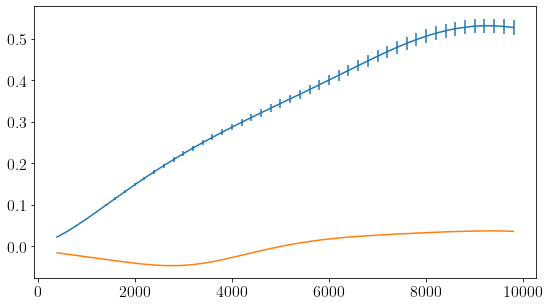

In [104]:
label_size = 17
title_size = 22
legend_size = 13
handle_length = 1.5
fig, (ax1) = plt.subplots(1,1,figsize=(9,5),sharey=True)

ax=ax1

ax.errorbar(l,fac_plc*cl_tot,yerr=fac_plc*np.sqrt(covll))
ax.plot(l,fac_plc*cl_lensing)

In [105]:
cl_kSZ_kSZ_g_fiducial = cl_kSZ_kSZ_g_planck.copy()
ell_array = np.asarray(cl_kSZ_kSZ_g_fiducial['ell'])

# fac_cov = 1e0
covmat_data = np.diag(covll)

inv_covmat_data = np.linalg.inv(covmat_data)
det_covmat_data = np.linalg.det(covmat_data)

fac_cl_to_dl = (2.726e6)**2*np.asarray(cl_kSZ_kSZ_g_fiducial['ell'])*(np.asarray(cl_kSZ_kSZ_g_fiducial['ell'])+1.)/2./np.pi

cl_ksz_tot = np.asarray(cl_kSZ_kSZ_g_fiducial['1h'])+np.asarray(cl_kSZ_kSZ_g_fiducial['2h'])+np.asarray(cl_kSZ_kSZ_g_fiducial['3h'])
cl_lens = np.asarray(cl_kSZ_kSZ_g['lensing term'])


In [118]:
dcl_kSZ_kSZ_g_tot = []
dl_kSZ_kSZ_g_tot_plus = []
dl_kSZ_kSZ_g_tot_minus = []

delta_p_over_p = 1e-7
param_list = ['A_ksz','A_lens']
param_fiducial_values = [1.,1]
comps_list = [cl_ksz_tot,cl_lens]


cl_ksz_obs = param_fiducial_values[0]*cl_ksz_tot + param_fiducial_values[1]*cl_lens

for i in range(len(param_list)):
    ti = time.perf_counter()
    
    cl_kSZ_kSZ_g_tot_plus = cl_ksz_obs + delta_p_over_p*param_fiducial_values[i]*comps_list[i]
    dl_kSZ_kSZ_g_tot_plus.append(fac_cl_to_dl*cl_kSZ_kSZ_g_tot_plus)
    
    cl_kSZ_kSZ_g_tot_minus = cl_ksz_obs - delta_p_over_p*param_fiducial_values[i]*comps_list[i]
    dl_kSZ_kSZ_g_tot_minus.append(fac_cl_to_dl*cl_kSZ_kSZ_g_tot_minus)
    
    

    dcl_kSZ_kSZ_g_tot.append((cl_kSZ_kSZ_g_tot_plus-cl_kSZ_kSZ_g_tot_minus)/2./param_fiducial_values[i]/delta_p_over_p)
    tf = time.perf_counter()
    print(f"computed in {tf - ti:0.4f} seconds")

computed in 0.0000 seconds
computed in 0.0000 seconds


In [119]:
#theory parameters
M_parameters = len(param_list)




dmu_parameters = []
for m in range(M_parameters):
    dmu_parameters.append(np.asarray(dcl_kSZ_kSZ_g_tot[m]))#/np.sqrt(fac_cov))


fisher_F = np.zeros((M_parameters,M_parameters))
for a in range(M_parameters):
    for b in range(M_parameters):
        fisher_M_ab = np.outer(dmu_parameters[a],dmu_parameters[b]) + np.outer(dmu_parameters[b],dmu_parameters[a])
        fisher_F[a][b]=0.5*np.trace(np.matmul(inv_covmat_data,fisher_M_ab))

inverse_fisher_F = np.linalg.inv(fisher_F)
fisher_sigmas = []
for m in range(M_parameters):
    fisher_sigmas.append(np.sqrt(inverse_fisher_F[m][m]))
fisher_sigmas = np.asarray(fisher_sigmas)
print(fisher_sigmas) 

[0.00485177 0.02041102]


In [120]:
1/fisher_sigmas

array([206.11017345,  48.99314841])